# Test Model on Important Cases.

In [1]:
import numpy as np
np.random.seed(4917)
from keras.models import Model,load_model
import matplotlib.pyplot as plt
import skvideo.io
%matplotlib inline
from test_environments import Environment1, Environment2, Environment3
%matplotlib inline
from time import time
from Settings import *
##### IMPORTANT SELECT WHICH ENVIRONMENT YOU WANT TO TEST FROM HERE
env=2

Using Theano backend.


### Load the model

In [2]:
train_m=target_m = 187
#model = load_model('cur_mod/{}/model.h5'.format(train_m))
model = load_model('output/{}/MOD/target_model.h5'.format(target_m))

/home/aqeel/miniconda3/envs/py4/lib/python3.5/site-packages/keras/models.py:150: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [3]:

if env==1:
    game = Environment1()
    game.GenerateWorld()
    AIAgent,DAgent = [game.agents[x] for x in game.agents]
    DAgent.Direction='E'
    AIAgent.Direction='E'
elif env==2:
    game = Environment2()
    game.GenerateWorld()
    AIAgent,DAgent = [game.agents[x] for x in game.agents]
    DAgent.Direction='S'
    AIAgent.Direction='S'
else:
    game = Environment3()
    game.GenerateWorld()
    AIAgent,DAgent = [game.agents[x] for x in game.agents]
    DAgent.Direction='E'

Env:2,Should go
Taken: 0.2462923526763916


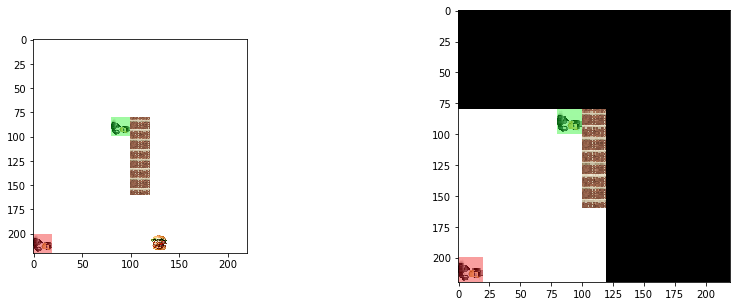

In [4]:
plt.figure(figsize=(13,5))
#AIAgent.NextAction=Settings.PossibleActions[3]
game.Step()
ax = plt.subplot(1,3,1)
ax.imshow(game.BuildImage())
ax = plt.subplot(1,2,2)
ax.imshow(game.AgentViewPoint(AIAgent.ID))
ax = plt.subplot(1,2,2)
ax.imshow(game.AgentViewPoint(DAgent.ID))

In [5]:
print('Testing Target Model')
env=4
TestingCounter=0
TestingCounter+=1
writer = skvideo.io.FFmpegWriter("Final_Results/VID_ENV_{}_Test_{}.avi".format(env,TestingCounter))
writer2 = skvideo.io.FFmpegWriter("Final_Results/VID_ENV_{}_TestAG_{}.avi".format(env,TestingCounter))
game.GenerateWorld()
img = game.BuildImage()
plt.imsave('Final_Results/VID_ENV_{}_Test_{}.png'.format(env,TestingCounter),img)
Start = time()
episode_reward=0
observation = AIAgent.Flateoutput()

writer.writeFrame(np.array(img*255,dtype=np.uint8))
for t in range(1000):
    s =np.array([observation])
    q = model.predict(s, batch_size=1)
    action = np.argmax(q[0])
    print(Settings.PossibleActions[action],action)
    AIAgent.NextAction = Settings.PossibleActions[action]
    #DAgent.DetectAndAstar()
    game.Step()
    writer.writeFrame(np.array(game.BuildImage()*255,dtype=np.uint8))
    writer2.writeFrame(np.array(game.AgentViewPoint(AIAgent.ID)*255,dtype=np.uint8))
    observation = AIAgent.Flateoutput()
    reward = AIAgent.CurrentReward
    done = game.Terminated[0]
    #observation, reward, done, info = env.step(action)
    episode_reward += reward
    if done:
        break

writer.close()
writer2.close()
Start = time()-Start
print(t)

Testing Target Model
[['L', 'E'], ['M', 'E']] 3
[['L', 'E'], ['M', 'E']] 3
[['L', 'E'], ['M', 'E']] 3
[['L', 'E'], ['M', 'E']] 3
[['L', 'E'], ['M', 'E']] 3
[['L', 'E'], ['M', 'E']] 3
5


* nonsense
* nonsense
* nonsense
* nonsense
* nonsense
* nonsense
* nonsense
* nonsense
* nonsense
* nonsense
* nonsense
* nonsense
* nonsense
* nonsense
* nonsense
* nonsense
* nonsense
* nonsense
* nonsense
* nonsense
* nonsense
* nonsense
* nonsense
* nonsense